## Example for Plotting the model as map or as profile

In [1]:
import swmm_api
print(f'{swmm_api.__version__ = }')

swmm_api.__version__ = '0.4.57'


In [2]:
from swmm_api import SwmmInput
from swmm_api.input_file.macros import nodes_dict, PlottingMap, init_empty_map_plot, add_node_map, add_link_map, add_subcatchment_map, add_node_labels, plot_map, plot_longitudinal

In [3]:
inp = SwmmInput('epa_swmm_examples_5_1/Example1.inp')

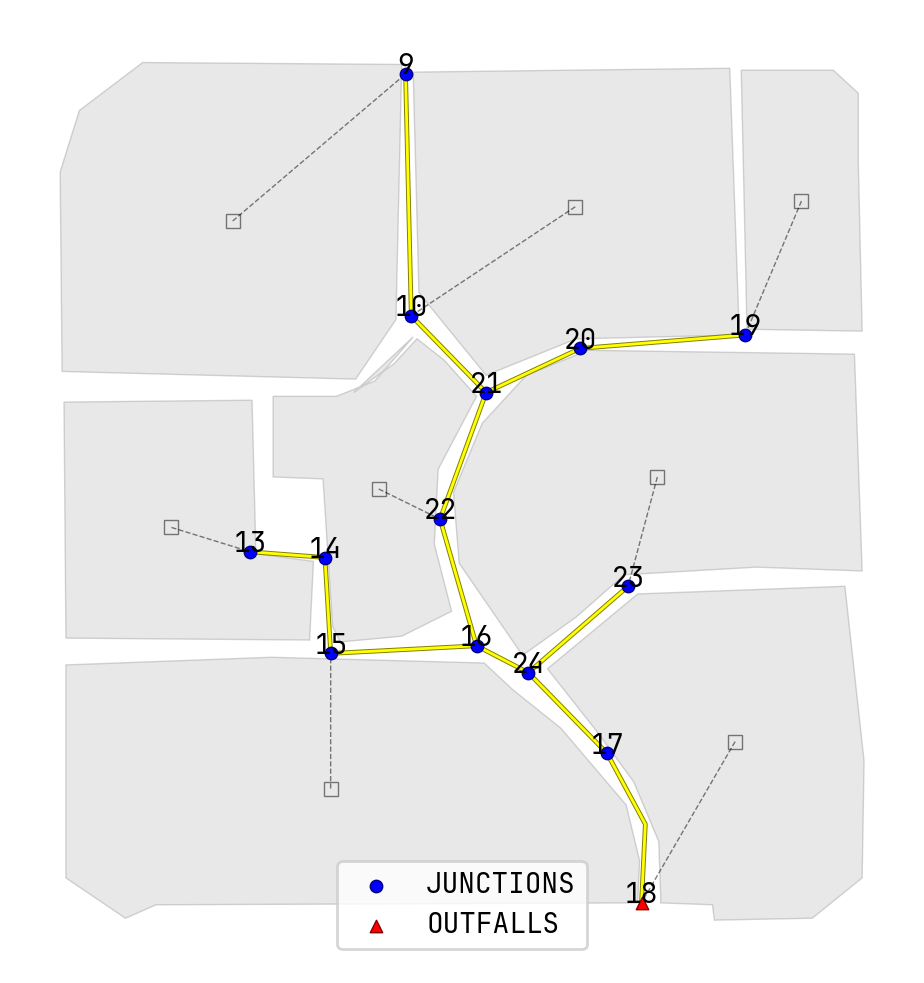

In [4]:
fig, ax = plot_map(inp)

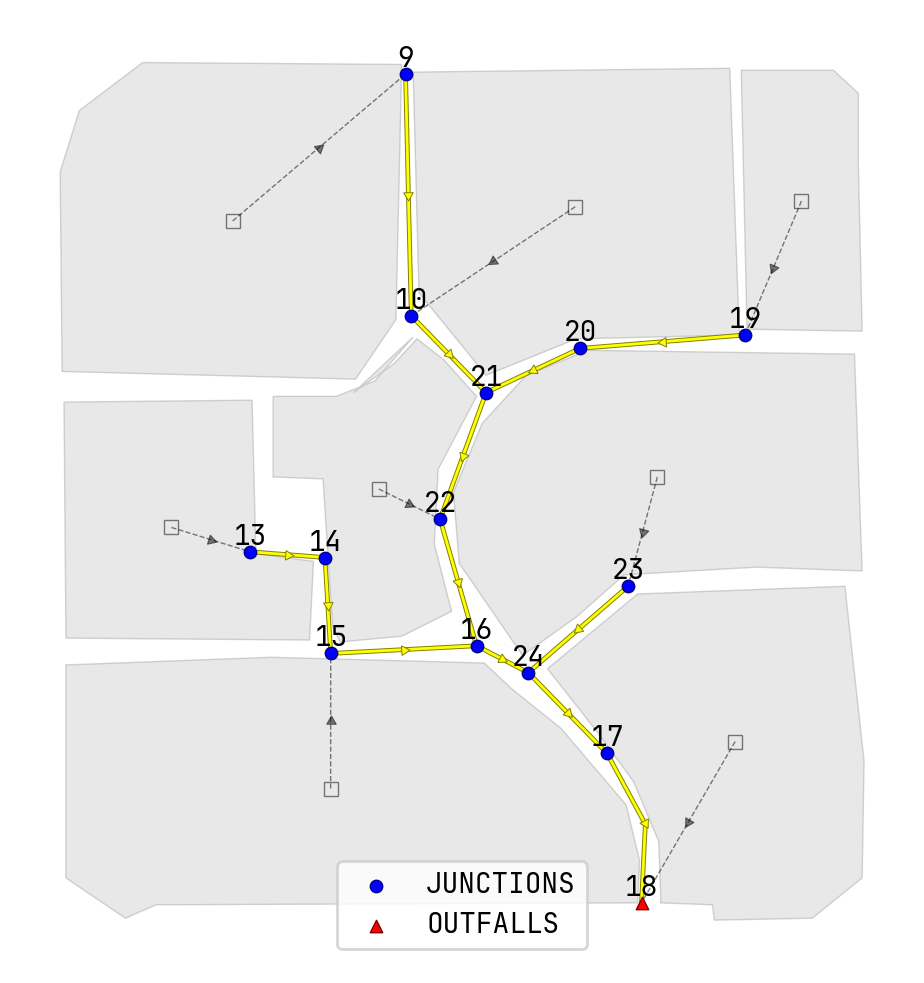

In [6]:
m = PlottingMap(inp).add_subcatchment_map(add_connector_arrows=True).add_link_map(add_arrows=True).add_node_map().add_node_labels(y_offset=80)
# fig, ax = m.fig, m.ax

Text(0.5, 1.0, "start_node='9', end_node='18'")

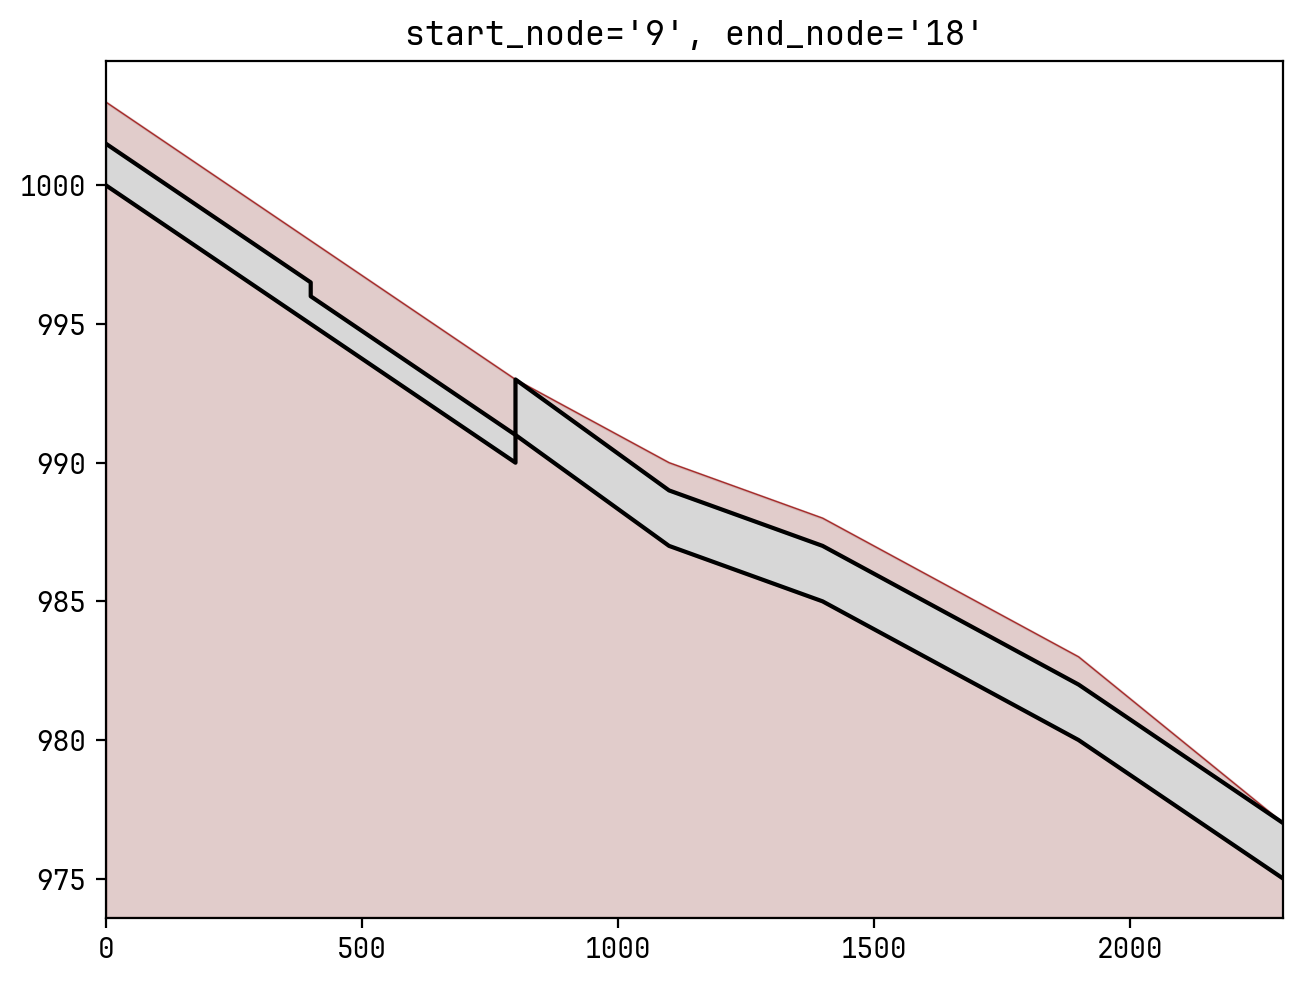

In [4]:
_, ax = plot_longitudinal(inp, start_node='9', end_node='18')
ax.set_title("start_node='9', end_node='18'")

Text(0.5, 1.0, "start_node='9', end_node='18', zero_node='22'")

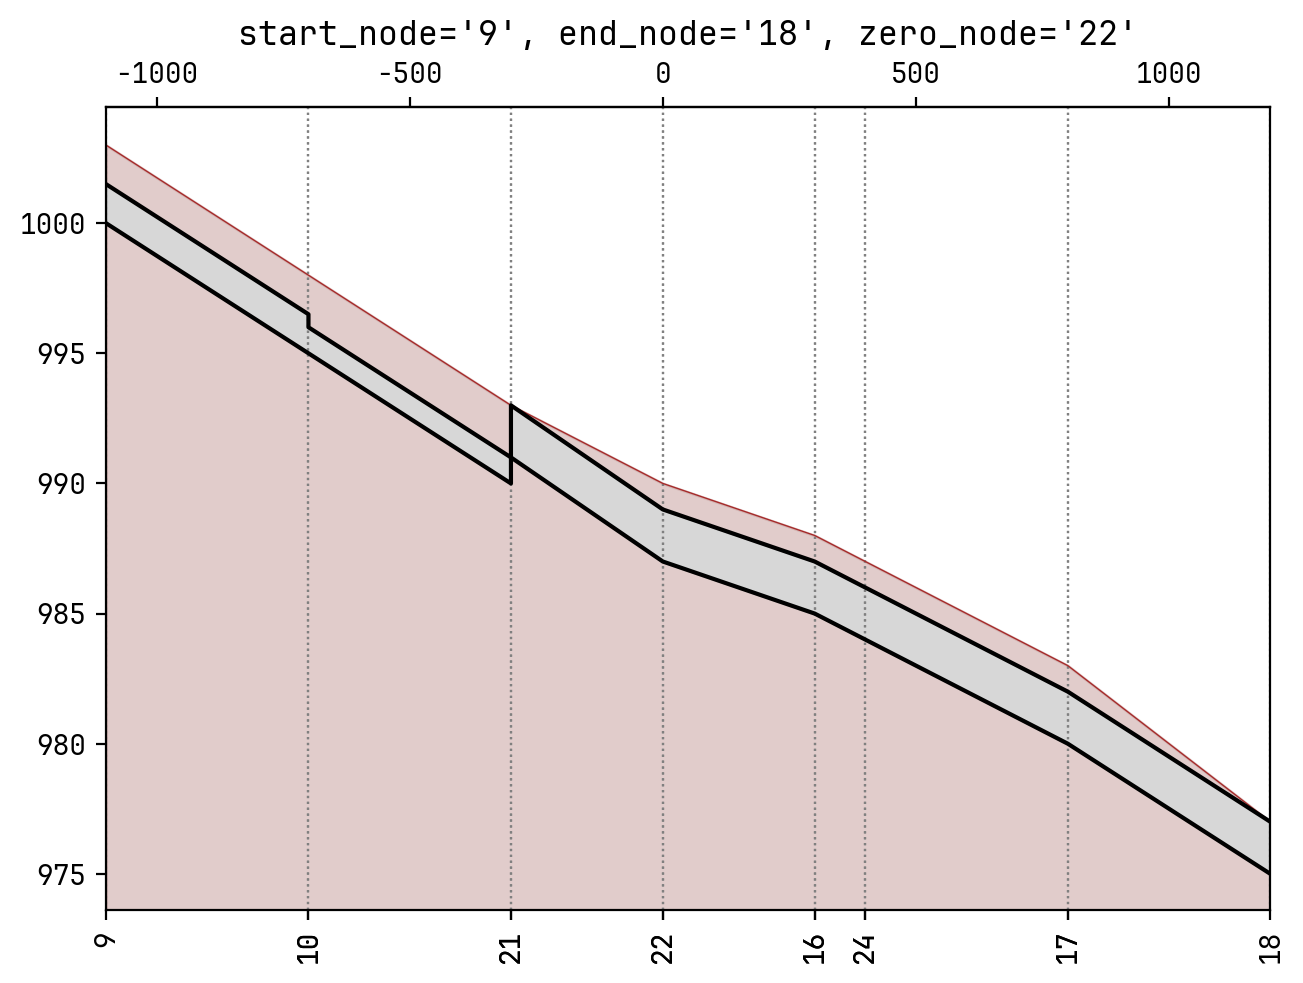

In [5]:
_, ax = plot_longitudinal(inp, start_node='9', end_node='18', zero_node='22', add_node_labels=True)
ax.set_title("start_node='9', end_node='18', zero_node='22'")

In [6]:
from swmm_api.run_swmm import swmm5_run_owa, swmm5_run_temporary

with swmm5_run_temporary(inp.copy(), run=swmm5_run_owa, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport

Text(0.5, 1.0, "start_node='9', end_node='18'\nmaximum depth")

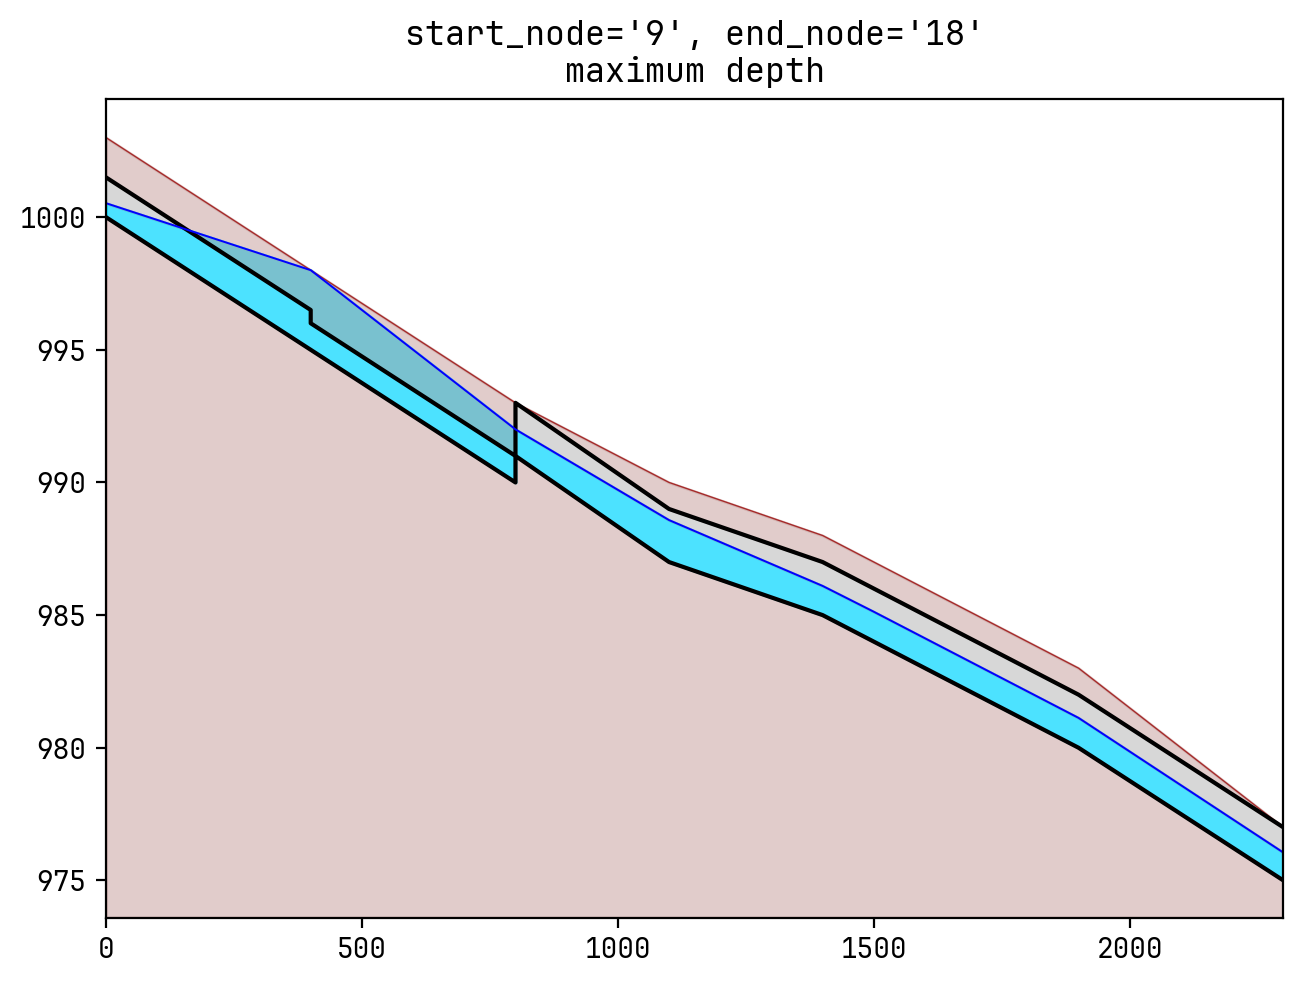

In [7]:
_, ax = plot_longitudinal(inp, start_node='9', end_node='18', out=out, depth_agg_func=lambda x: x.max())
ax.set_title("start_node='9', end_node='18'\nmaximum depth")

In [8]:
rpt.node_depth_summary

Type  Average_Depth_Feet  Maximum_Depth_Feet  Maximum_HGL_Feet  \
Node                                                                       
9     JUNCTION                0.08                0.53           1000.53   
10    JUNCTION                0.26                3.00            998.00   
13    JUNCTION                0.05                0.37            995.37   
14    JUNCTION                0.06                0.42            990.42   
15    JUNCTION                0.15                1.10            988.10   
16    JUNCTION                0.17                1.10            986.10   
17    JUNCTION                0.17                1.13            981.13   
19    JUNCTION                0.03                0.22           1010.22   
20    JUNCTION                0.03                0.22           1005.22   
21    JUNCTION                1.15                2.00            992.00   
22    JUNCTION                1.11                1.59            988.59   
23    JUNCTION                0.05                0.35            990.35   
24    JUNCTION                0.17                1.13            985.13   
18     OUTFALL                0.16                1.05            976.05   

     Time of Max_Occurrence_days hr:min  Reported_Max Depth_Feet  
Node                                                              
9                       0 days 04:01:00                     0.53  
10                      0 days 02:17:00                     3.00  
13                      0 days 03:31:00                     0.37  
14                      0 days 03:33:00                     0.42  
15                      0 days 04:01:00                     1.10  
16                      0 days 04:01:00                     1.10  
17                      0 days 04:02:00                     1.12  
19                      0 days 04:01:00                     0.22  
20                      0 days 04:01:00                     0.22  
21                      0 days 03:04:00                     2.00  
22                      0 days 04:16:00                     1.58  
23                      0 days 04:01:00                     0.35  
24                      0 days 04:01:00                     1.13  
18                      0 days 04:02:00                     1.05

In [9]:
inp.SUBCATCHMENTS.frame

rain_gage outlet  area  imperviousness  width  slope  curb_length  \
name                                                                     
1          RG1      9  10.0            50.0  500.0   0.01          0.0   
2          RG1     10  10.0            50.0  500.0   0.01          0.0   
3          RG1     13   5.0            50.0  500.0   0.01          0.0   
4          RG1     22   5.0            50.0  500.0   0.01          0.0   
5          RG1     15  15.0            50.0  500.0   0.01          0.0   
6          RG1     23  12.0            10.0  500.0   0.01          0.0   
7          RG1     19   4.0            10.0  500.0   0.01          0.0   
8          RG1     18  10.0            10.0  500.0   0.01          0.0   

      snow_pack  
name             
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN  
8           NaN

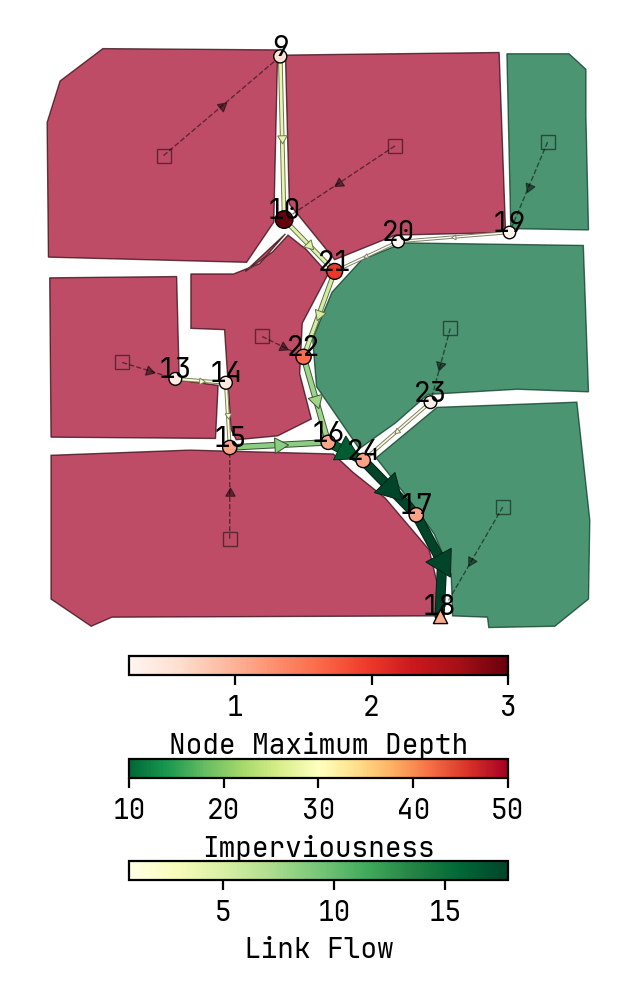

In [10]:
from swmm_api.output_file import OBJECTS, VARIABLES

link_flow = out.get_part(OBJECTS.LINK, None, VARIABLES.LINK.FLOW)

node_max_depth = rpt.node_depth_summary['Maximum_Depth_Feet'].to_dict()

sc_imp = inp.SUBCATCHMENTS.frame.imperviousness.to_dict()

_, ax = init_empty_map_plot()
add_link_map(ax, inp, values_dict=link_flow.loc['1998-01-01 04:00'].to_dict(), make_width_proportional=True, cmap='YlGn', colorbar_kwargs={'label':'Link Flow'}, add_arrows=True, line_width_max=3, line_width_default=0.5)
add_subcatchment_map(ax, inp, cmap='RdYlGn_r', values_dict=sc_imp, colorbar_kwargs={'label':'Imperviousness'}, alpha=0.7, add_connector_arrows=True)
add_node_map(ax, inp, make_size_proportional=True, cmap='Reds', values_dict=node_max_depth, colorbar_kwargs={'label':'Node Maximum Depth'})
add_node_labels(ax, inp, y_offset=15)

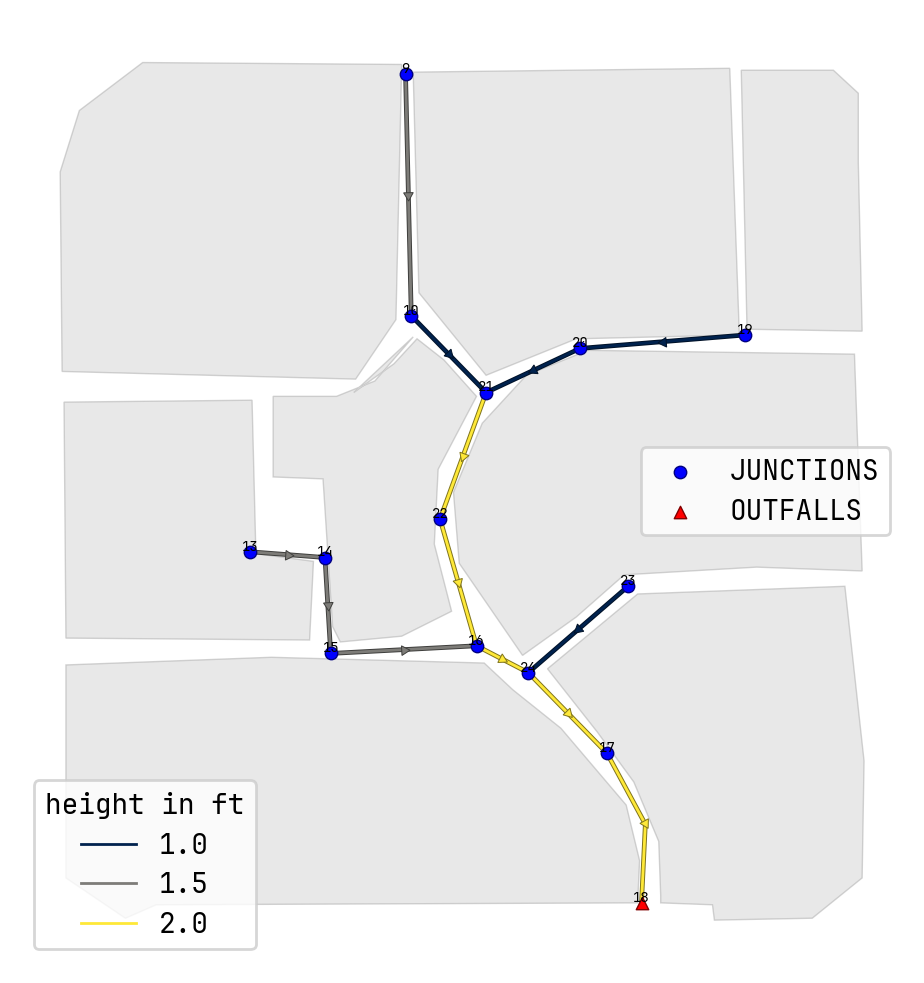

In [11]:
fig, ax = init_empty_map_plot()
add_link_map(ax, inp, add_arrows=True, values_dict={k: v.height for k, v in inp.XSECTIONS.items()},
             make_width_proportional=False, line_width_max=5, cmap='cividis',
             colorbar_kwargs={'label': 'height in ft', 'loc': 'lower left'}, discrete=True)
add_subcatchment_map(ax, inp, add_connector_line=False, add_center_point=False)
add_node_map(ax, inp)
add_node_labels(ax, inp, size=5, y_offset=15)

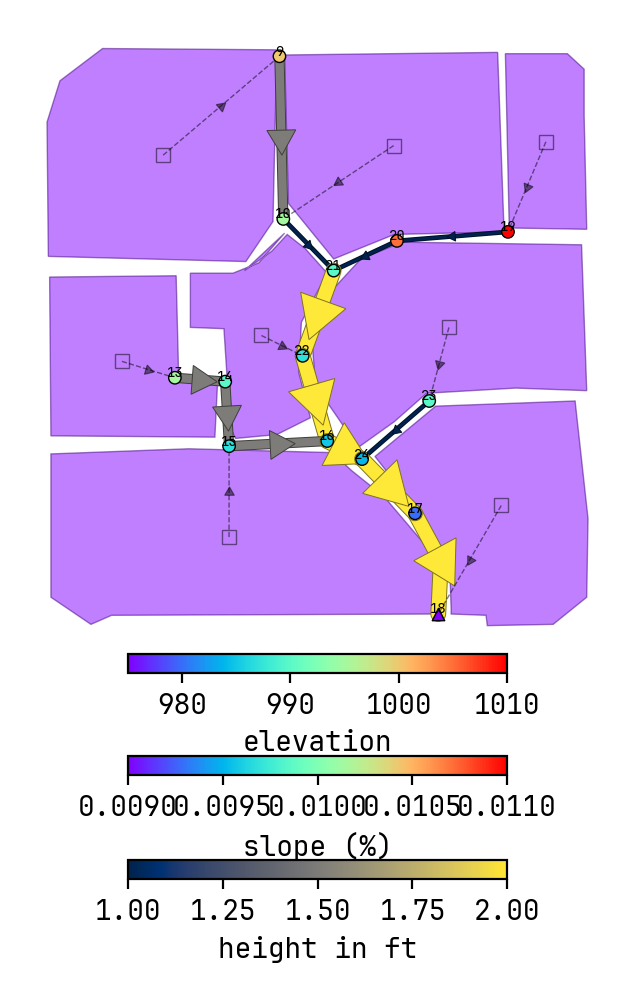

In [12]:
fig, ax = init_empty_map_plot()
add_link_map(ax, inp, add_arrows=True, values_dict={k: v.height for k, v in inp.XSECTIONS.items()},
             make_width_proportional=True, line_width_max=5, cmap='cividis', colorbar_kwargs={'label': 'height in ft'})

add_subcatchment_map(ax, inp, add_connector_arrows=True, linewidth=0.5, alpha=0.5, fill=True,
                     values_dict={k: v.slope for k, v in inp.SUBCATCHMENTS.items()}, discrete=False, colorbar_kwargs={'label': 'slope (%)'}, cmap='rainbow')
add_node_map(ax, inp, values_dict={k: v.elevation for k, v in nodes_dict(inp).items()}, cmap='rainbow', colorbar_kwargs={'label': 'elevation'})
add_node_labels(ax, inp, size=5, y_offset=15)


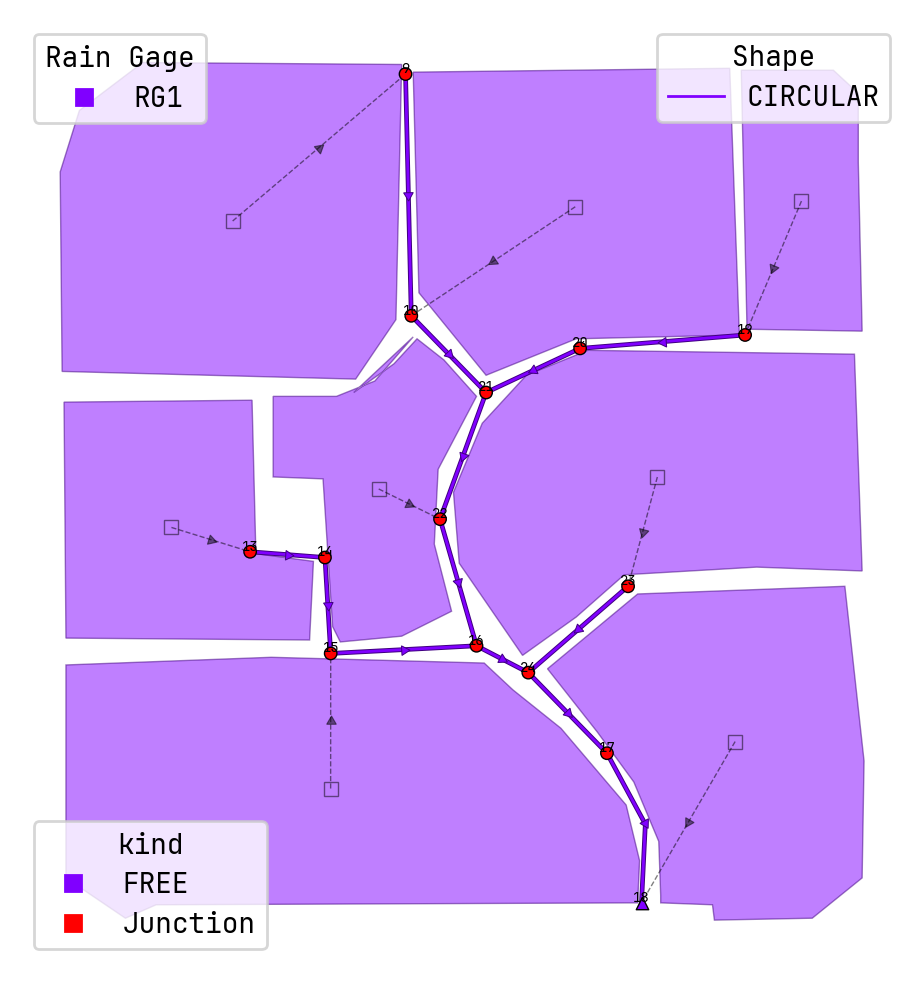

In [13]:
fig, ax = init_empty_map_plot()
add_link_map(ax, inp, add_arrows=True, values_dict={k: v.shape for k, v in inp.XSECTIONS.items()},
             cmap='rainbow', colorbar_kwargs={'label': 'Shape', 'loc': 'upper right'}, discrete=True)

add_subcatchment_map(ax, inp, add_connector_arrows=True, linewidth=0.5, alpha=0.5, fill=True,
                     values_dict={k: v.rain_gage for k, v in inp.SUBCATCHMENTS.items()},
                     discrete=True, colorbar_kwargs={'title': 'Rain Gage', 'loc': 'upper left'}, cmap='rainbow')

add_node_map(ax, inp, values_dict={k: v.kind if hasattr(v, 'kind') else 'Junction' for k, v in nodes_dict(inp).items()},
             cmap='rainbow', colorbar_kwargs={'title': 'kind', 'loc': 'lower left'}, discrete=True)

add_node_labels(ax, inp, size=5, y_offset=15)